In [1]:
import pandas as pd
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read in data set of avocado prices
avo = pd.read_csv('avocado-prices/avocado.csv')

In [3]:
#view top 5 lines of data frame
avo.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
#take a look at data types and notice Date as a time series object
avo.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [5]:
#check for missing values in dataframe 
avo.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
#parse date time string into month and year only
avo.Date.str.slice(-8,-3).head(20)

0     15-12
1     15-12
2     15-12
3     15-12
4     15-11
5     15-11
6     15-11
7     15-11
8     15-11
9     15-10
10    15-10
11    15-10
12    15-10
13    15-09
14    15-09
15    15-09
16    15-09
17    15-08
18    15-08
19    15-08
Name: Date, dtype: object

In [7]:
#converts Date column to pandas date time
avo['Date'] = pd.to_datetime(avo.Date)

In [8]:
#take a look at dataframe
avo.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
#notice if dtype for Date changes to pandas datetime
avo.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [10]:
#take a look at day of month info for first ten entries of data frame
avo.Date.dt.day.head(10)

0    27
1    20
2    13
3     6
4    29
5    22
6    15
7     8
8     1
9    25
Name: Date, dtype: int64

In [11]:
#take a look at what day of the week avocado price is assessed
avo.Date.dt.dayofweek.head(10)

0    6
1    6
2    6
3    6
4    6
5    6
6    6
7    6
8    6
9    6
Name: Date, dtype: int64

### All days listed above are Sunday since in Pandas datetime, Monday = 0 and Sunday  = 6.  

In [12]:
#create pandas date time index for Jan 1 2018
ts = pd.to_datetime('1/1/2018')

In [13]:
#take a look at most recent entries for avocado prices
avo.loc[avo.Date >= ts,:]


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
8478,0,2018-03-25,1.57,149396.50,16361.69,109045.03,65.45,23924.33,19273.80,4270.53,380.00,conventional,2018,Albany
8479,1,2018-03-18,1.35,105304.65,13234.86,61037.58,55.00,30977.21,26755.90,3721.31,500.00,conventional,2018,Albany
8480,2,2018-03-11,1.12,144648.75,15823.35,110950.68,70.00,17804.72,14480.52,3033.09,291.11,conventional,2018,Albany
8481,3,2018-03-04,1.08,139520.60,12002.12,105069.57,95.62,22353.29,16128.51,5941.45,283.33,conventional,2018,Albany
8482,4,2018-02-25,1.28,104278.89,10368.77,59723.32,48.00,34138.80,30126.31,3702.49,310.00,conventional,2018,Albany
8483,5,2018-02-18,1.43,85630.24,5499.73,61661.76,75.00,18393.75,15677.67,2336.08,380.00,conventional,2018,Albany
8484,6,2018-02-11,1.45,121804.36,8183.48,95548.47,61.00,18011.41,13264.91,4295.39,451.11,conventional,2018,Albany
8485,7,2018-02-04,1.03,216738.47,7625.65,195725.06,143.53,13244.23,10571.60,2422.63,250.00,conventional,2018,Albany
8486,8,2018-01-28,1.57,93625.03,3101.17,74627.23,55.59,15841.04,11614.79,4159.58,66.67,conventional,2018,Albany
8487,9,2018-01-21,1.69,135196.35,3133.37,116520.88,88.78,15453.32,10023.79,5429.53,0.00,conventional,2018,Albany


In [14]:
#get max time date stamp
avo.Date.max()

Timestamp('2018-03-25 00:00:00')

In [15]:
#get min time date stamp
avo.Date.min()

Timestamp('2015-01-04 00:00:00')

### This shows that the time span for this dataset goes from Jan 4, 2015 to Mar 25, 2018.  This is an important consideration when doing data exploration of avocado prices in 2018 since the entire year is not represented.  

In [16]:
#create pandas date time index for year column in dataframe
%matplotlib inline
avo['year'] = avo.Date.dt.year

In [17]:
#take a look at first five entries of dataframe
avo.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


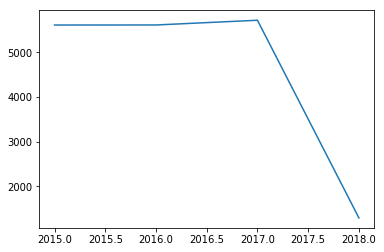

In [18]:
#plot year against count to notice any trends in date time
avo.year.value_counts().sort_index().plot()

### The plot above shows as we had seen before that there is not as much data on avocado prices in 2017 and 2018 in this particular dataset

(array([ 735568.,  735689.,  735811.,  735933.,  736055.,  736177.,
         736299.,  736420.,  736542.,  736664.,  736785.]),
 <a list of 11 Text xticklabel objects>)

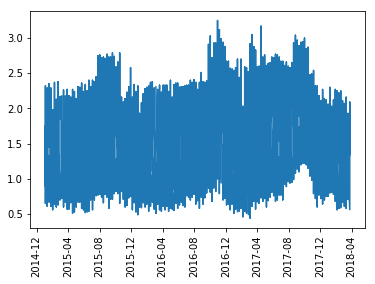

In [31]:
import matplotlib.pyplot as plt
avo = avo.sort_values('Date', ascending = True)
plt.plot(avo['Date'],avo['AveragePrice'])
plt.xticks(rotation = 'vertical')

In [32]:
avo.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

(array([ 2014.5,  2015. ,  2015.5,  2016. ,  2016.5,  2017. ,  2017.5,
         2018. ,  2018.5]), <a list of 9 Text xticklabel objects>)

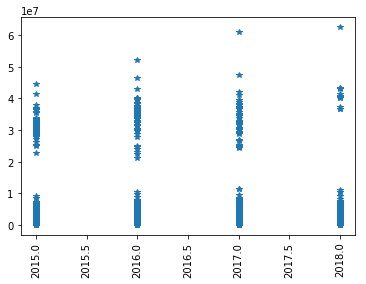

In [33]:
plt.plot(avo['year'], avo['Total Volume'], '*')
plt.xticks(rotation = 'vertical')

### The total volume of avocado sales has increased over the time series of this dataset however the price of avocados has peaked in Fall of 2015, Winter of 2016 and Winter of 2017.  This makes sense since California avocado growing season lasts from approximately Feb to Sept. 